In [1]:
# import libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr 

In [2]:
# import training data
df_train = pd.read_csv('/home/minshiu/diablo_crypto_prediction/train.csv')
df_train

,Id,timestamp,number_of_transactions,financial_products_stash1,financial_products_stash2,financial_products_stash3,financial_products_stash4,financial_products_stash5,financial_products_stash6,financial_products_stash7,Expected
0,121,1527033600,2460,15807.15579,38537087.63,1846133.815,1103496.763,4600.025964,186182.6298,2212270.289,46.762982
1,122,1526947200,2449,15868.66619,38535112.22,1897306.111,1134275.222,4861.944364,191192.2218,2273975.667,45.222182
2,123,1526860800,2463,16028.11099,38537208.43,1899319.213,1135151.843,4827.685164,191293.4258,2275675.528,51.842582
3,124,1526601600,2443,15630.41579,38537253.68,1898646.840,1135377.368,4820.235964,191428.6798,2275782.104,47.367982
4,125,1526515200,2407,16085.20379,38308267.67,1891298.835,1130673.767,4805.033964,190872.6698,2266351.301,53.766982
5,126,1526428800,2433,16358.93099,38307320.78,1891935.388,1130691.078,4718.655164,190735.7758,2266513.233,51.077582
6,127,1526342400,2477,15988.87979,38441402.40,1901091.200,1136672.240,4909.979964,191477.3998,2278716.720,52.239982
7,128,1526256000,2379,15654.62379,38441590.52,1901840.260,1136964.052,4912.103964,191675.5198,2278562.156,54.051982
8,129,1525996800,2420,15959.66059,38499106.38,1929038.192,1153189.638,4822.776764,194461.3838,2311598.915,49.638382
9,130,1525910400,2434,16345.49979,38498926.25,1929008.125,1153329.625,4666.749964,194171.2498,2312288.875,49.624982


In [3]:
# display correlation of each features

# from the table below, we can have a brief idea that timestamp, Id and financial_products_stash1 
# shows significant linear relationship with respect to response variable(Expected)

df_train.corr()

,Id,timestamp,number_of_transactions,financial_products_stash1,financial_products_stash2,financial_products_stash3,financial_products_stash4,financial_products_stash5,financial_products_stash6,financial_products_stash7,Expected
Id,1.000000,-0.999959,-0.442851,-0.760396,-0.372123,-0.389808,-0.389135,-0.568943,-0.396439,-0.389237,-0.812559
timestamp,-0.999959,1.000000,0.442460,0.760534,0.369612,0.393023,0.392350,0.568864,0.399631,0.392451,0.811824
number_of_transactions,-0.442851,0.442460,1.000000,0.385718,0.189598,0.118810,0.118667,0.315473,0.121724,0.118735,0.398039
financial_products_stash1,-0.760396,0.760534,0.385718,1.000000,0.447876,-0.005094,-0.005743,0.567849,0.001137,-0.005842,0.750507
financial_products_stash2,-0.372123,0.369612,0.189598,0.447876,1.000000,-0.361841,-0.362028,0.365646,-0.358416,-0.362027,0.327504
financial_products_stash3,-0.389808,0.393023,0.118810,-0.005094,-0.361841,1.000000,0.999991,-0.031828,0.999846,0.999992,0.246511
financial_products_stash4,-0.389135,0.392350,0.118667,-0.005743,-0.362028,0.999991,1.000000,-0.032377,0.999838,0.999994,0.245808
financial_products_stash5,-0.568943,0.568864,0.315473,0.567849,0.365646,-0.031828,-0.032377,1.000000,-0.027390,-0.032193,0.523248
financial_products_stash6,-0.396439,0.399631,0.121724,0.001137,-0.358416,0.999846,0.999838,-0.027390,1.000000,0.999845,0.255230
financial_products_stash7,-0.389237,0.392451,0.118735,-0.005842,-0.362027,0.999992,0.999994,-0.032193,0.999845,1.000000,0.245819


In [4]:
# extract all features out from pandas dataframedf_train.corr()
Id = df_train.Id.tolist()
ts = df_train.timestamp.tolist()
num = df_train.number_of_transactions.tolist()
fps1 = df_train.financial_products_stash1.tolist()
fps2 = df_train.financial_products_stash2.tolist()
fps3 = df_train.financial_products_stash3.tolist()
fps4 = df_train.financial_products_stash4.tolist()
fps5 = df_train.financial_products_stash5.tolist()
fps6 = df_train.financial_products_stash6.tolist()
fps7 = df_train.financial_products_stash7.tolist()
exp = df_train.Expected.tolist()

Text(0.5, 1.0, 'Num_Of_Transaction vs Expected')

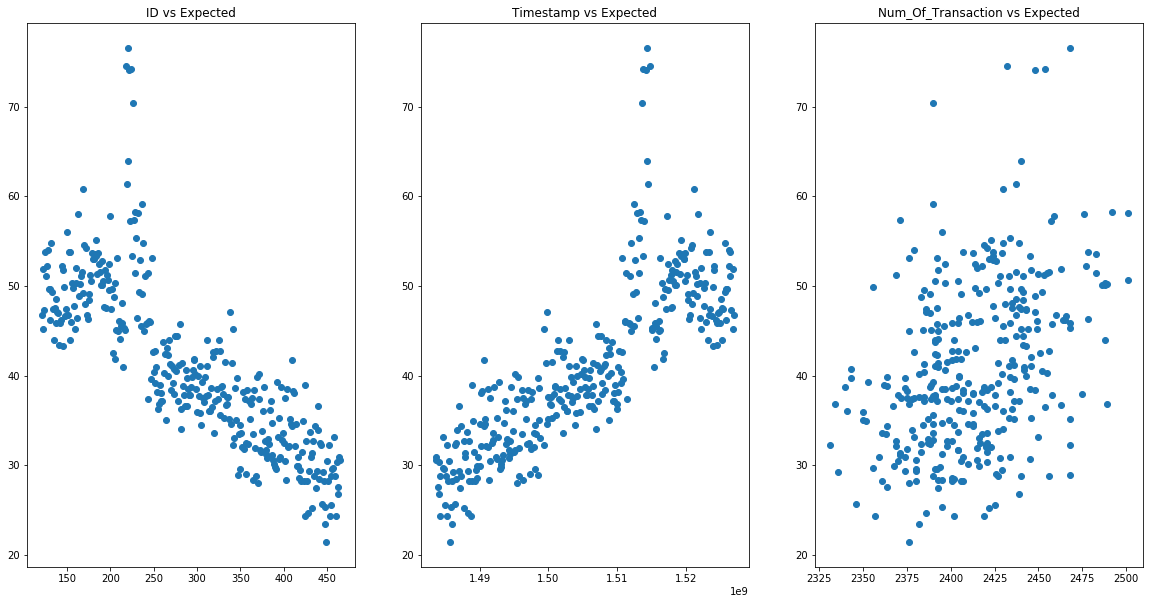

In [5]:
# plot each explanatory variable against response variable to check for distribution

# from graph of ID and Timestamp we know that there is a strong linear relationship against response var
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
ax1.scatter(Id, exp)
ax1.set_title('ID vs Expected')

ax2.scatter(ts, exp)
ax2.set_title('Timestamp vs Expected')

# weak linear relationship spotted from this graph
ax3.scatter(num, exp)
ax3.set_title('Num_Of_Transaction vs Expected')

Text(0.5, 1.0, 'Fps3 vs Expected')

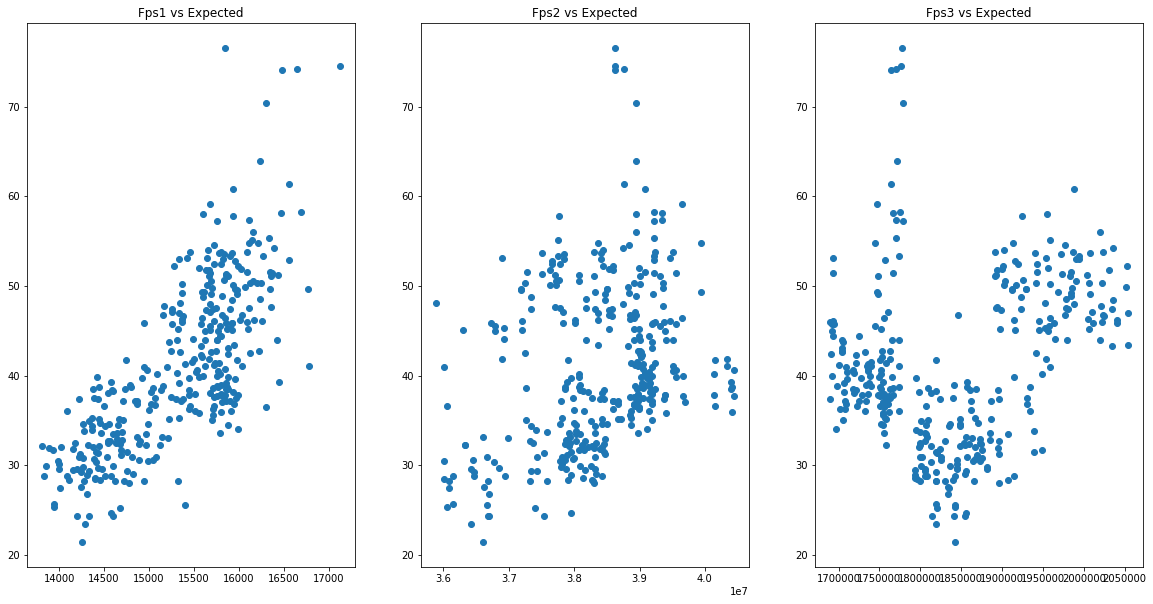

In [6]:
figs, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(20, 10))

# financial_products_stash1 has strong linear relationship against response var as well
ax4.scatter(fps1, exp)
ax4.set_title('Fps1 vs Expected')

# a logarithmic transformation is suggested for financial_products_stash2 
ax5.scatter(fps2, exp)
ax5.set_title('Fps2 vs Expected')

# financial_products_stash3 shows quadracity against response var
ax6.scatter(fps3, exp)
ax6.set_title('Fps3 vs Expected')

Text(0.5, 1.0, 'Fps6 vs Expected')

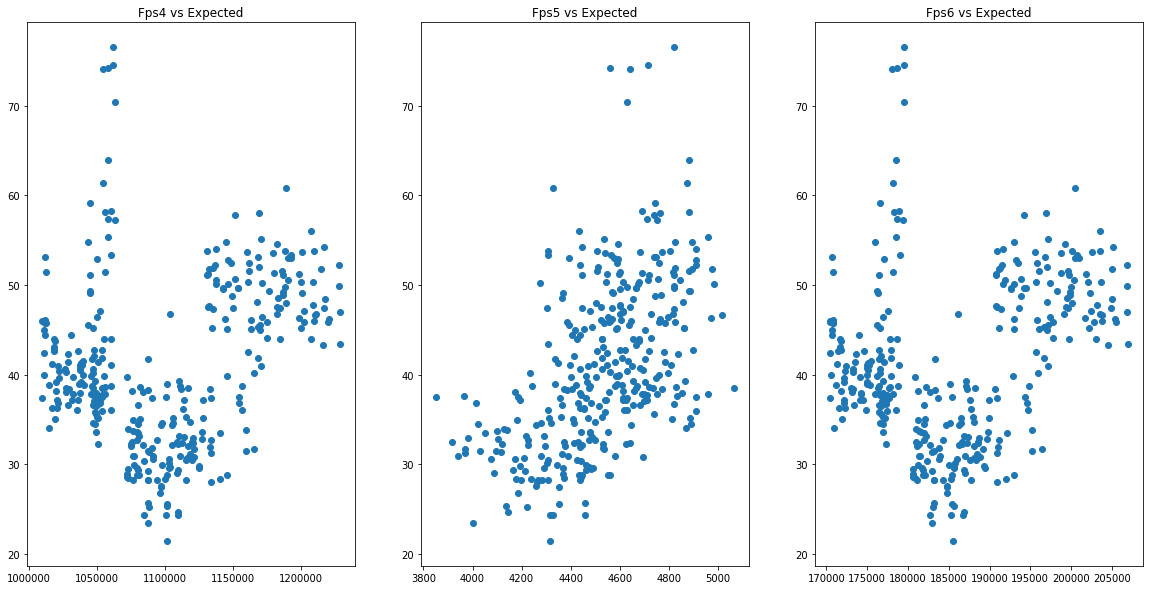

In [7]:
figs, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(20, 10))

# fps4(financial_products_stash4), fps6, and fps7 -> quadraticity
ax7.scatter(fps4, exp)
ax7.set_title('Fps4 vs Expected')

# linear relationship on fps5
ax8.scatter(fps5, exp)
ax8.set_title('Fps5 vs Expected')

ax9.scatter(fps6, exp)
ax9.set_title('Fps6 vs Expected')

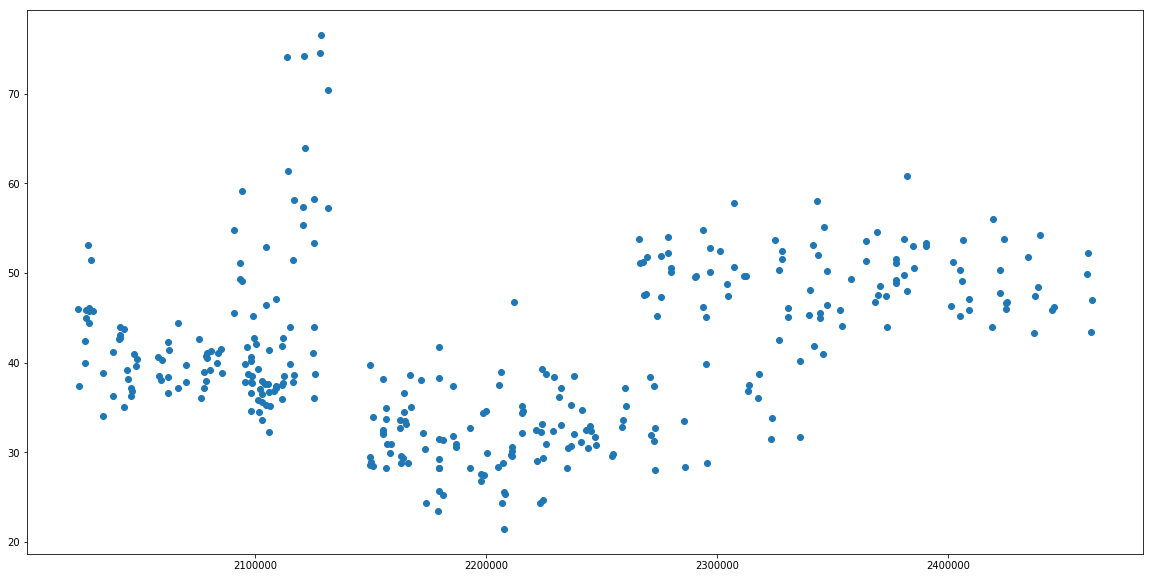

In [8]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(fps7, exp)

In [9]:
# observe from the plots above, some outliers are observed and hence I decide to remove all observation 
# with 'Expected' > 60

df_train = df_train[df_train.Expected < 60]

# regenerate all features
Id = df_train.Id.tolist()
ts = df_train.timestamp.tolist()
num = df_train.number_of_transactions.tolist()
fps1 = df_train.financial_products_stash1.tolist()
fps2 = df_train.financial_products_stash2.tolist()
fps3 = df_train.financial_products_stash3.tolist()
fps4 = df_train.financial_products_stash4.tolist()
fps5 = df_train.financial_products_stash5.tolist()
fps6 = df_train.financial_products_stash6.tolist()
fps7 = df_train.financial_products_stash7.tolist()
exp = df_train.Expected.tolist()

In [10]:
# Now, I decide to fit a polynomial curve for fps2-7 against response var
# preparation for curve fitting, extract min and max value for each features for linspace
df_train[['financial_products_stash2', 'financial_products_stash3', 'financial_products_stash4', \
          'financial_products_stash5', 'financial_products_stash6', 'financial_products_stash7']].describe()

,financial_products_stash2,financial_products_stash3,financial_products_stash4,financial_products_stash5,financial_products_stash6,financial_products_stash7
count,3.370000e+02,3.370000e+02,3.370000e+02,337.000000,337.000000,3.370000e+02
mean,3.835615e+07,1.842625e+06,1.101476e+06,4527.112516,185640.710928,2.208012e+06
std,9.601277e+05,9.854543e+04,5.912408e+04,232.022475,9893.660760,1.182576e+05
min,3.588241e+07,1.688940e+06,1.009227e+06,3849.543964,170379.229800,2.023278e+06
25%,3.781511e+07,1.756052e+06,1.049655e+06,4385.297964,176901.539800,2.104513e+06
50%,3.842610e+07,1.835057e+06,1.097007e+06,4538.571964,184773.289800,2.198763e+06
75%,3.903410e+07,1.916114e+06,1.145780e+06,4691.145964,193037.619800,2.296768e+06
max,4.044476e+07,2.053925e+06,1.228503e+06,5066.437964,206968.693800,2.462221e+06


Text(0, 0.5, 'Expected')

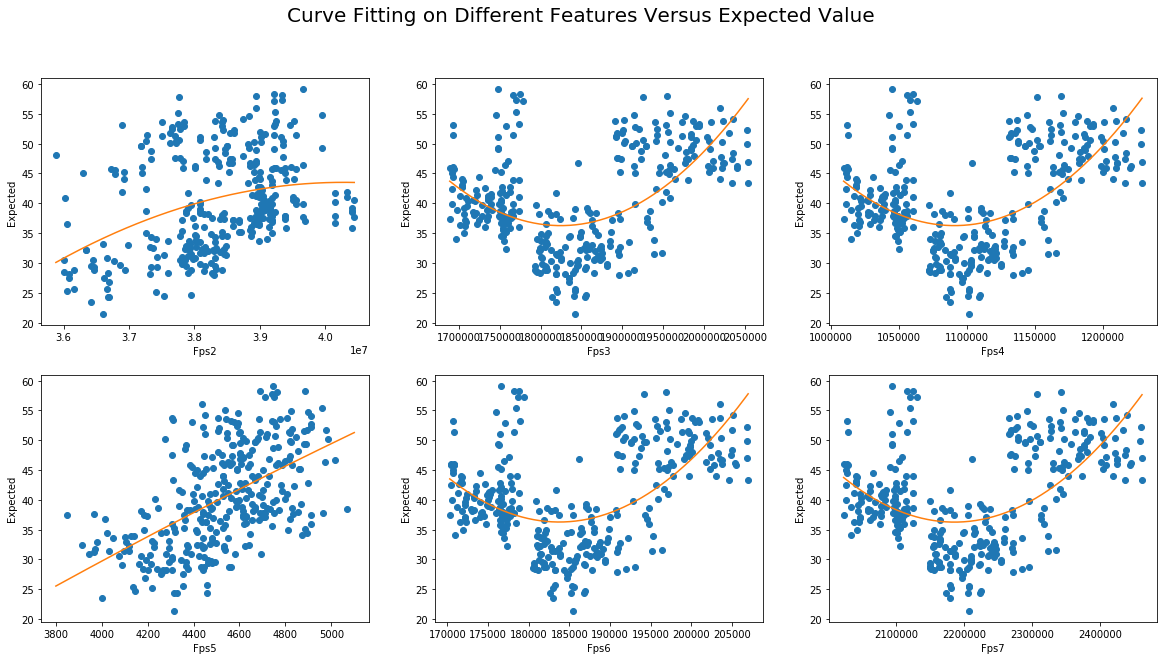

In [11]:
# curve fitting
curve2 = np.poly1d(np.polyfit(fps2, exp, 2))
curve3 = np.poly1d(np.polyfit(fps3, exp, 2))
curve4 = np.poly1d(np.polyfit(fps4, exp, 2))
curve5 = np.poly1d(np.polyfit(fps5, exp, 2))
curve6 = np.poly1d(np.polyfit(fps6, exp, 2))
curve7 = np.poly1d(np.polyfit(fps7, exp, 2))

# use linspace to generate points to plot fitting curve
t2 = np.linspace(35882000, 40445000, 200)
t3 = np.linspace(1688900, 2054000, 200)
t4 = np.linspace(1009200, 1228600, 200)
t5 = np.linspace(3800, 5100, 200)
t6 = np.linspace(170300, 207000, 200)
t7 = np.linspace(2023200, 2462300, 200)

# plot fitting curve
figures, axes = plt.subplots(2, 3, figsize=(20, 10))
figures.suptitle('Curve Fitting on Different Features Versus Expected Value', fontsize=20)
axes[0, 0].plot(fps2, exp, 'o', t2, curve2(t2), '-')
axes[0, 0].set_xlabel('Fps2')
axes[0, 0].set_ylabel('Expected')

axes[0, 1].plot(fps3, exp, 'o', t3, curve3(t3), '-')
axes[0, 1].set_xlabel('Fps3')
axes[0, 1].set_ylabel('Expected')

axes[0, 2].plot(fps4, exp, 'o', t4, curve4(t4), '-')
axes[0, 2].set_xlabel('Fps4')
axes[0, 2].set_ylabel('Expected')

axes[1, 0].plot(fps5, exp, 'o', t5, curve5(t5), '-')
axes[1, 0].set_xlabel('Fps5')
axes[1, 0].set_ylabel('Expected')

axes[1, 1].plot(fps6, exp, 'o', t6, curve6(t6), '-')
axes[1, 1].set_xlabel('Fps6')
axes[1, 1].set_ylabel('Expected')

axes[1, 2].plot(fps7, exp, 'o', t7, curve7(t7), '-')
axes[1, 2].set_xlabel('Fps7')
axes[1, 2].set_ylabel('Expected')

In [12]:
# from above graphs, its obvious that fps3,4,6 and 7 has almost identical patterns.
# Hence, we can further check their correlation at below
# The result shows that there are strongly related to each other, so I will only use 1 of them for modelling
df_train[['financial_products_stash3', 'financial_products_stash4', \
          'financial_products_stash6', 'financial_products_stash7']].corr()

,financial_products_stash3,financial_products_stash4,financial_products_stash6,financial_products_stash7
financial_products_stash3,1.000000,0.999992,0.999856,0.999992
financial_products_stash4,0.999992,1.000000,0.999850,0.999994
financial_products_stash6,0.999856,0.999850,1.000000,0.999856
financial_products_stash7,0.999992,0.999994,0.999856,1.000000


In [13]:
# Same thing goes to id and timestamp
df_train[['Id', 'timestamp']].corr()

,Id,timestamp
Id,1.000000,-0.999961
timestamp,-0.999961,1.000000


In [14]:
# from the graph of fps2 versus expected, I mentioned that logarithmic transformation is suggested
# the result below shows that this transformation slightly increase it's linear correlation
print(np.corrcoef(df_train.financial_products_stash2.apply(lambda x: np.log(x)), exp))
print(np.corrcoef(df_train.financial_products_stash2.tolist(),exp))

[[1.         0.34047829]
 [0.34047829 1.        ]]
[[1.         0.33888198]
 [0.33888198 1.        ]]


In [15]:
# use statsmodel to build a model 
# perform quadratic curve fitting on fps3, logarithmic transformation on fps2
formula = 'Expected ~ Id + financial_products_stash1 + number_of_transactions \
           + np.log(financial_products_stash2) + financial_products_stash5 + \
           I(4.04431011e-10*financial_products_stash3**2 -1.47585090e-03*financial_products_stash3 + \
           1.38267672e+03)'
results = smf.ols(formula, data=df_train).fit()

In [16]:
#shows model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     192.2
Date:                Fri, 28 Dec 2018   Prob (F-statistic):          1.74e-104
Time:                        19:12:18   Log-Likelihood:                -940.06
No. Observations:                 337   AIC:                             1894.
Df Residuals:                     330   BIC:                             1921.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================================================
                                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                          160.6655    168.683      0.952      0.342    -171.165     492.496
Id                                                                                                                  -0.0643      0.005    -13.272      0.000      -0.074      -0.055
financial_products_stash1                                                                                            0.0023      0.001      4.276      0.000       0.001       0.003
number_of_transactions                                                                                               0.0001      0.007      0.019      0.985      -0.014       0.014
np.log(financial_products_stash2)                                                                                   -7.8010      9.744     -0.801      0.424     -26.968      11.366
financial_products_stash5                                                                                            0.0011      0.001      0.926      0.355      -0.001       0.003
I(4.04431011e-10 * financial_products_stash3 ** 2 - 1.47585090e-03 * financial_products_stash3 + 1.38267672e+03)    -0.1349      0.070     -1.918      0.056      -0.273       0.003
==============================================================================
Omnibus:                       11.472   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.864
Skew:                           0.458   Prob(JB):                      0.00265
Kurtosis:                       3.082   Cond. No.                     1.26e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# The above results shows high p-value for num_of_transactions ( > 0.5), which means this feature has small
# impact to the response variable, hence I decide to remove it
formula = 'Expected ~ Id + financial_products_stash1 \
           + np.log(financial_products_stash2) + financial_products_stash5 + \
           I(4.04431011e-10*financial_products_stash3**2 -1.47585090e-03*financial_products_stash3 + \
           1.38267672e+03)'
results2 = smf.ols(formula, data=df_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     231.3
Date:                Fri, 28 Dec 2018   Prob (F-statistic):          1.09e-105
Time:                        19:12:18   Log-Likelihood:                -940.06
No. Observations:                 337   AIC:                             1892.
Df Residuals:                     331   BIC:                             1915.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================================================================
                                                                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                          160.9842    167.566      0.961      0.337    -168.644     490.613
Id                                                                                                                  -0.0643      0.005    -13.575      0.000      -0.074      -0.055
financial_products_stash1                                                                                            0.0023      0.001      4.287      0.000       0.001       0.003
np.log(financial_products_stash2)                                                                                   -7.8006      9.729     -0.802      0.423     -26.939      11.338
financial_products_stash5                                                                                            0.0011      0.001      0.930      0.353      -0.001       0.003
I(4.04431011e-10 * financial_products_stash3 ** 2 - 1.47585090e-03 * financial_products_stash3 + 1.38267672e+03)    -0.1349      0.070     -1.924      0.055      -0.273       0.003
==============================================================================
Omnibus:                       11.482   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.875
Skew:                           0.458   Prob(JB):                      0.00264
Kurtosis:                       3.082   Cond. No.                     1.24e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# The new model yield better results, with the equation:
# let Y be Expected, X1 be fps1, X2 be fps2, etc..

# Y = 160.9842 - 0.0643*Id + 0.0023*X1 - 7.8006*log(X2) + 0.0011*X5 - \
# 0.1349(4.0443e-10*X3^2 - 1.4759e-03*X3 + 1.3827e3)

In [19]:
# Verification for result
df_test = pd.read_csv('/home/minshiu/diablo_crypto_prediction/test.csv')

In [20]:
# Produce result using the consturcted model
df_test['Expected'] = 160.9842 - 0.0643*df_test['Id'] + 0.0023*df_test['financial_products_stash1'] - \
                      7.8006*df_test['financial_products_stash2'].apply(lambda x: np.log(x)) \
                      + 0.0011*df_test['financial_products_stash5'] - \
                      0.1349*(df_test['financial_products_stash3'].apply(lambda x: x**2)*4.0443e-10 - \
                      df_test['financial_products_stash3']*1.4759e-03 + 1.3827e3)

In [21]:
df_test

,Id,timestamp,number_of_transactions,financial_products_stash1,financial_products_stash2,financial_products_stash3,financial_products_stash4,financial_products_stash5,financial_products_stash6,financial_products_stash7,Expected
0,0,1539705600,2439,15435.25739,35337856.05,1887068.024,1127853.605,4632.709564,190001.0478,2260830.814,60.909129
1,1,1539619200,2444,15575.31099,34850384.43,1901282.213,1136670.443,4430.885164,191439.4258,2279061.328,60.945494
2,2,1539360000,2489,14844.63579,34850740.53,1876530.265,1121624.053,4684.605964,188935.5298,2248422.159,59.653153
3,3,1539273600,2470,15185.95499,34579833.30,1876536.648,1121823.330,4783.159164,189158.2958,2248429.989,60.543134
4,4,1539187200,2479,14554.15179,34580113.46,1878876.730,1123217.346,4771.191964,189238.4598,2251232.038,58.998916
5,5,1539014400,2433,15267.97579,34626874.98,1878847.490,1123223.498,4853.495964,189429.9798,2251460.494,60.656577
6,6,1538755200,2469,15093.59899,34626774.67,1824432.333,1090230.467,4595.433164,183919.6658,2185991.400,60.067517
7,7,1538755200,2454,14653.97579,34626554.98,1878857.490,1123111.498,4359.495964,189349.9798,2251774.494,58.572390
8,8,1538668800,2404,15425.92619,35849733.27,1853821.636,1108212.327,4569.154364,186668.2718,2221606.982,60.357242
9,9,1538668800,2461,15585.97579,34626364.98,1878837.490,1123327.498,4501.495964,189539.9798,2251852.494,60.743751


In [22]:
# As a result, this approach currently obtain 13.15815 score using Mean-F1 Score validation method.
# Further explanation of this validation method can be found on 
## https://www.kaggle.com/c/diablo-cryptocurrency-price-prediction#evaluation